In [0]:
import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt


In [49]:
batch_size = 128                      # The size of each batch is 128.
num_classes = 10                      # The number of classes 10 as from 0 to 9.
epochs = 12                           # 12 epochs are used for efficiency. 

# input image dimensions 28 x 28 pixel. 
img_rows, img_cols = 28, 28

# the data, split between train and test sets.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':   # data reshaping at the first channel.
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:                                           # data reshaping at the other channels.
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
# converts from integer to float.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalizes the pixel values of a gray-scale image.
x_train /= 255
x_test /= 255
# prints the number of train / test samples. 
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


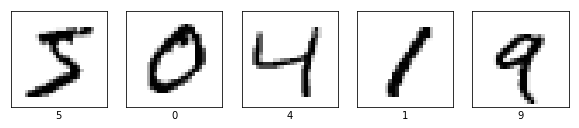

In [50]:
# prints the samples of handwritten digit images. 
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
    

In [51]:

# converts class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

# 1st convolutional layer with 6 feature maps, 5 x 5 kernels, stride 1, and 
# activation function of ReLU. 
# NOTE: number of feature maps will provide number of features in higher dimensions. 
# like features of a sharp shape, a curve shape, or an edge shape in an image.
model.add(Conv2D(6, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))

# max pooling 2 x 2 with stride 1
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd conv layer with 16 feature maps, 5 x 5 kernels, stride 1, and activation 
# function of ReLU.
model.add(Conv2D(16, (5, 5), activation='relu'))

# max pooling 2 x 2 with stride 1
model.add(MaxPooling2D(pool_size=(2, 2)))

# flattening is required to pass the feature maps through fully connected layers. 
model.add(Flatten())

# fully connected layer with 120 nodes and ReLU activation function.
model.add(Dense(120, activation='relu'))

# fully connected layer with 84 nodes and ReLU activation function.
model.add(Dense(84, activation='relu'))

# Output layer with softmax activation function.
model.add(Dense(num_classes, activation='softmax'))

# https://keras.io/optimizers/ 
# Adadelta optimizer is more robust than Adagrad that adapts learning rates based 
# on a moving window of gradient updates, instead of accumulating all past gradients. 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.1, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy'])

# trains training data and stores the values of the accruacies and losses (errors) 
# of train / test data for each epoch. 
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# calculates the final loss and the final accuracy. 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 27s 447us/step - loss: 0.8003 - acc: 0.7629 - val_loss: 0.2515 - val_acc: 0.9228
Epoch 2/12
60000/60000 [==============================] - 26s 433us/step - loss: 0.2286 - acc: 0.9309 - val_loss: 0.1836 - val_acc: 0.9436
Epoch 3/12
60000/60000 [==============================] - 25s 411us/step - loss: 0.1764 - acc: 0.9468 - val_loss: 0.1438 - val_acc: 0.9555
Epoch 4/12
60000/60000 [==============================] - 23s 390us/step - loss: 0.1467 - acc: 0.9557 - val_loss: 0.1199 - val_acc: 0.9631
Epoch 5/12
60000/60000 [==============================] - 23s 388us/step - loss: 0.1262 - acc: 0.9620 - val_loss: 0.1086 - val_acc: 0.9662
Epoch 6/12
60000/60000 [==============================] - 24s 400us/step - loss: 0.1118 - acc: 0.9666 - val_loss: 0.0954 - val_acc: 0.9691
Epoch 7/12
60000/60000 [==============================] - 23s 390us/step - loss: 0.1016 - acc: 0.9688 - val_loss: 0.

In [44]:
# checks the shape of the test images
print(x_test.shape)
test_loss, test_acc = model.evaluate(x_test, y_test)

# checks the accuracy of the CNN model. 
print('Test accuracy:', test_acc)


(10000, 28, 28, 1)
10000/10000 [==============================] - 2s 189us/step
('Test accuracy:', 0.9787)


In [45]:
# stores the values of the history in the pandas. 
hist = pd.DataFrame(history.history)

# prints the accruacies and losses (errors) of train / test data
# for each epoch. 
print(hist)


         acc      loss  val_acc  val_loss
0   0.767100  0.843230   0.9230  0.256907
1   0.936900  0.215411   0.9470  0.169198
2   0.952100  0.161992   0.9602  0.133659
3   0.960417  0.134240   0.9623  0.122006
4   0.965833  0.116679   0.9692  0.100266
5   0.969233  0.103862   0.9713  0.091707
6   0.972083  0.094738   0.9731  0.087405
7   0.973717  0.087272   0.9758  0.079270
8   0.975667  0.081559   0.9756  0.074905
9   0.977333  0.076437   0.9791  0.069142
10  0.978017  0.072406   0.9791  0.063469
11  0.979650  0.068337   0.9787  0.065233


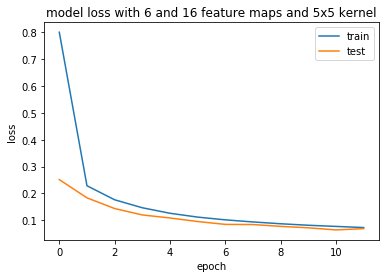

In [52]:
# plots the model loss with 
fig = plt.figure()
plt.subplot()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss with 6 and 16 feature maps and 5x5 kernel')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

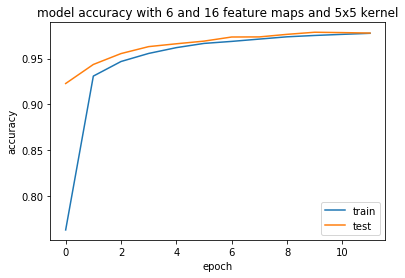

In [53]:
fig = plt.figure()
plt.subplot()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy with 6 and 16 feature maps and 5x5 kernel')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()